In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/bank_data/bank-data-full.csv', sep=';')
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [3]:
data.shape

(41188, 21)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Coverting yes to  -- > 1 and No -- > 0
data['y'] = data['y'].map({'yes':1, 'no':0})

In [6]:
data.describe(include = ["O"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


### Calculate percentage of positive cases

In [7]:
positive_perc = (data[data['y'] == 1]['y']).sum()/len(data)
print("Percentage  of positive cases %.3f" % positive_perc)

Percentage  of positive cases 0.113


### Check correlation among social data

In [8]:
social_data = data[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
social_data.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [9]:
#check if there is any null value in social data
print('Number of missing values in social data: ', social_data.isnull().sum())

Number of missing values in social data:  emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


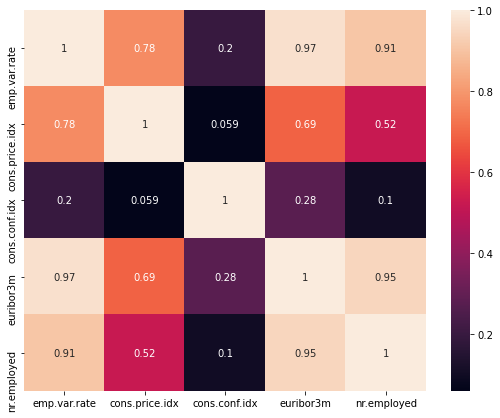

In [10]:
social_data_corr = social_data.corr()
f, ax = plt.subplots(figsize=(9,7))
heatmap = sns.heatmap(social_data_corr, annot=True, ax = ax)
figure = heatmap.get_figure()


### Find the relationship between the duration, month and contacts

In [11]:
# get the details of the month in data
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [12]:
months = ['mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
calls_by_month = dict(data.groupby(['month'])['duration'].count())
calls_by_month

{'apr': 2632,
 'aug': 6178,
 'dec': 182,
 'jul': 7174,
 'jun': 5318,
 'mar': 546,
 'may': 13769,
 'nov': 4101,
 'oct': 718,
 'sep': 570}

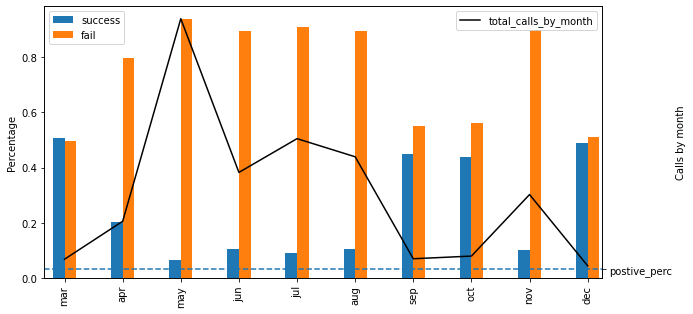

In [13]:
success = []
fail = []
total_calls = []

for month in months:
    percentage = (data[data['month'] == month]['y'] == 1).sum()/(data['month'] == month).sum()
    success.append(percentage)
    fail.append(1 - percentage)
    total_calls.append(calls_by_month[month])
    
    
month_data = pd.DataFrame({'success' : success, 'fail': fail, 'total_calls_by_month': total_calls})
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

month_data[['success', 'fail']].plot(kind = 'bar', width = 0.4,ax=ax)
month_data['total_calls_by_month'].plot( color='black', ax= ax2)
plt.axhline(y = 'postive_perc', linestyle= '--')

#ax = plt.gca()
plt.xlim([-0.35, 9.25])
ax.set_xticklabels(months)
ax.set_ylabel('Percentage')
ax2.set_ylabel('Calls by month')
plt.legend()
plt.show()

Few months have higher sucess rate becasue number of calls made in that month are very small

Text(0, 0.5, 'cons.price.idx_avg')

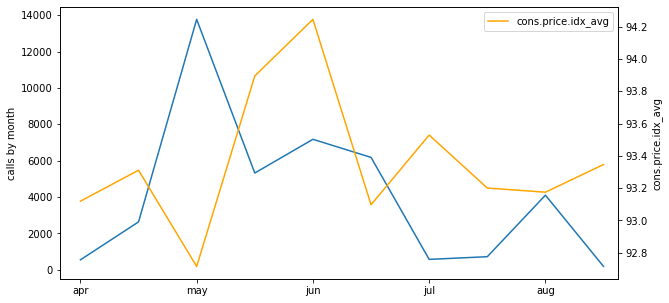

In [14]:
num_emp = dict(data.groupby('month')['cons.price.idx'].mean())
num_emp_list = list(num_emp.values())

month_data['cons.price.idx_avg'] = num_emp_list

fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
month_data['total_calls_by_month'].plot(ax= ax)
month_data['cons.price.idx_avg'].plot(color='orange', ax= ax2)
plt.xlim([-0.35, 9.25])
plt.legend()
ax.set_xticklabels(months)
ax.set_ylabel('calls by month')
ax2.set_ylabel("cons.price.idx_avg")

## Checking the correlation of success rate with duration of call

In [15]:
# setting value limit to avoid division by 0
data['new_dur'] = 0
data['new_dur'][(data['duration'] > 1500)] = '1500+'
data['new_dur'][(data['duration'] > 1000)&(data['duration'] <= 1500)] = '1000-1500'
data['new_dur'][(data['duration'] > 500)&(data['duration'] <= 1000)] = '500-1000'
data['new_dur'][(data['duration'] > 319)&(data['duration'] <= 500)] = '320-500'
data['new_dur'][(data['duration'] > 258)&(data['duration'] <= 320)] = '259-319'
data['new_dur'][(data['duration'] > 180)&(data['duration'] <= 260)] = '181-258'
data['new_dur'][(data['duration'] > 102)&(data['duration'] <= 180)] = '103-180'
data['new_dur'][(data['duration'] > 0)&(data['duration'] <= 100)] = '1-102'
data['new_dur'].unique()

array(['259-319', '103-180', '181-258', '320-500', '1-102', '1500+',
       '500-1000', '1000-1500', 0], dtype=object)

In [16]:
def draw_plot(var, data):
    if var == 'month':
        unique_values = ['mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
    elif var == 'new_dur':
        unique_values = ['0','1-102','103-180', '181-258','259-319','320-500','500-1000','1000-1500','1500+']
    
    else:
        unique_values = [v for v in data[var].value_counts().index]
        unique_values.sort()
        
    
    n_groups = len(unique_values)
    pos_list = []
    neg_list = []
    for i in unique_values:
        val = (data[data[var] == i]['y'] == 1).sum()/(data[var] == i).sum()
        pos_list.append(val)
        neg_list.append(1 - val)
        
        
    #draw plot
    fig, ax = plt.subplots(figsize=(10,6))
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.8
    ax1 = plt.bar(index, pos_list, bar_width, alpha=opacity, label='Positive')
    ax2 = plt.bar(index + bar_width, neg_list, bar_width, alpha=opacity, label='Negatives')
    
    plt.ylabel('Results')
    if var != 'age':
        plt.xticks(index + bar_width, unique_values)
    else:
        #plt.xticks(index + bar_width, unique_values, rotation = 90)
        plt.xticks(np.arange(0, 100, 10))
        
    plt.axhline(y = positive_perc, linestyle='--')
    plt.legend()
    plt.tight_layout()
    

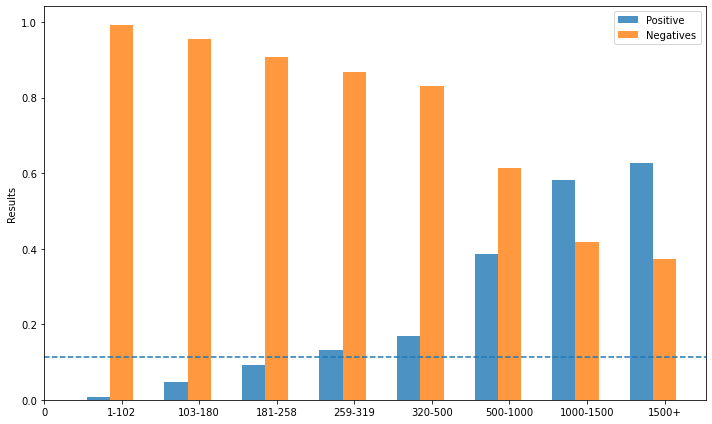

In [17]:
draw_plot('new_dur', data)

Above plot shows that when call duration increases, their success rate also increase. Especially when duration goes beyond 5 mins(260 sec), the success rate is greater than the average success rate

### Get the statistics of missing values

In [18]:
pd.crosstab(data['housing'], data['loan'])

loan,no,unknown,yes
housing,,,
no,16065,0,2557
unknown,0,990,0
yes,17885,0,3691


From above table , it is obeserved that unknown values for 'loan'  and 'housing' are exactly same. That means if we do not know if a person has a housing load or not , then we do not know if he has a personal loan and vice versa.

In [19]:
data[(data['housing'] =='unknown') & (data['loan'] =='unknown')]['pdays'].describe()

count    990.000000
mean     964.896970
std      180.927175
min        2.000000
25%      999.000000
50%      999.000000
75%      999.000000
max      999.000000
Name: pdays, dtype: float64

In [20]:
print (len(data[(data['housing'] =='unknown') & (data['loan'] =='unknown')& (data['pdays'] == 999)]))

956


956 out of 999 observations whose 'housing' and 'loan' are unknown have never been contacted before.

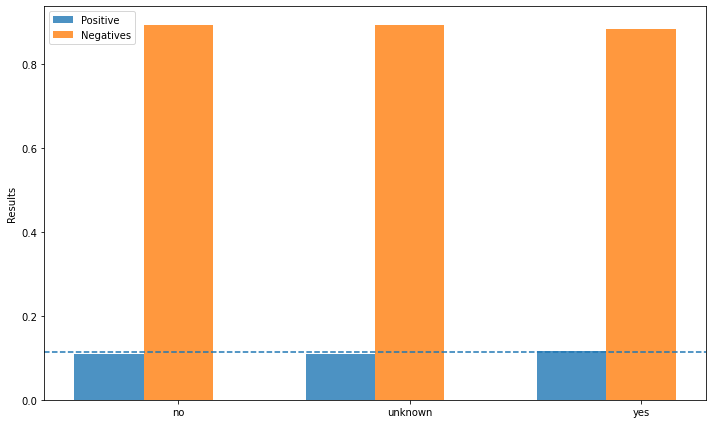

In [21]:
draw_plot('housing',data)

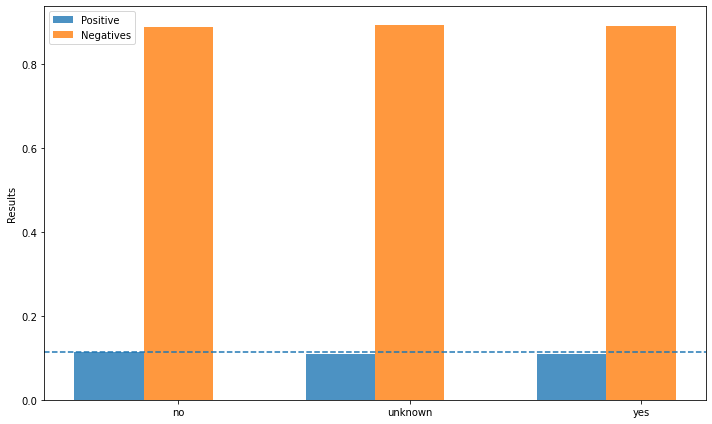

In [22]:
draw_plot('loan',data)

### Checking correlation with other variable

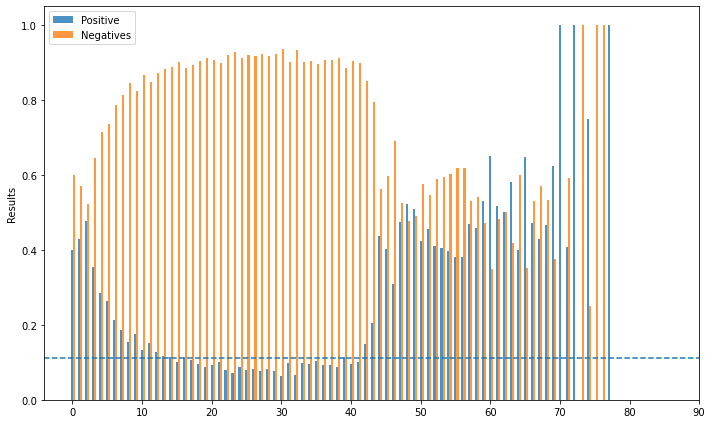

In [23]:
draw_plot('age',data)

The distribution of average success rate has two peaks, 
- One being in younger age below 20
- And the other in older age above 45

Text(0.5, 1.0, 'Percentage of Education levels')

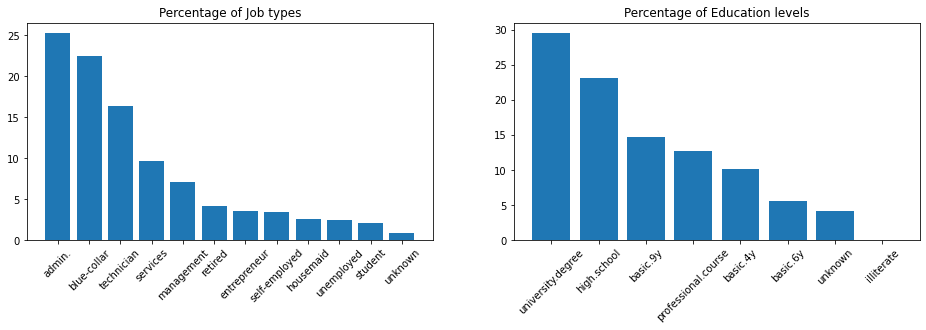

In [24]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].bar(x = data["job"].value_counts(normalize = True).index, height= data["job"].value_counts(normalize = True)*100)
ax[0].tick_params('x', labelrotation = 45)
ax[0].set_title("Percentage of Job types")
ax[1].bar(x = data["education"].value_counts(normalize = True).index, height = data["education"].value_counts(normalize = True)*100)
ax[1].tick_params('x', labelrotation=45)
ax[1].set_title("Percentage of Education levels")

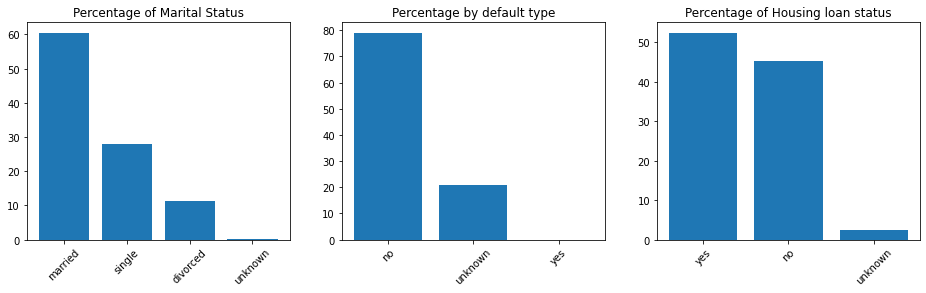

In [25]:
fig, ax = plt.subplots(1,3,figsize = (16,4))
ax[0].bar(x = data["marital"].value_counts(normalize = True).index, height= data["marital"].value_counts(normalize = True)*100)
ax[0].tick_params('x',labelrotation=45)
ax[0].set_title("Percentage of Marital Status")
ax[1].bar(x = data["default"].value_counts(normalize = True).index, height= data["default"].value_counts(normalize = True)*100)
ax[1].tick_params('x',labelrotation=45)
ax[1].set_title("Percentage by default type")
ax[2].bar(x = data["housing"].value_counts(normalize = True).index, height= data["housing"].value_counts(normalize = True)*100)
ax[2].tick_params('x',labelrotation=45)
ax[2].set_title("Percentage of Housing loan status");

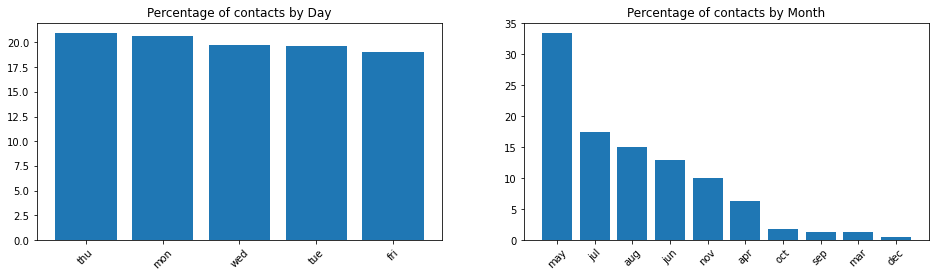

In [26]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].bar(x = data["day_of_week"].value_counts(normalize = True).index, height= data["day_of_week"].value_counts(normalize = True)*100)
ax[0].tick_params('x',labelrotation=45)
ax[0].set_title("Percentage of contacts by Day")
ax[1].bar(x = data["month"].value_counts(normalize = True).index, height= data["month"].value_counts(normalize = True)*100)
ax[1].tick_params('x',labelrotation=45)
ax[1].set_title("Percentage of contacts by Month");

In [27]:
data.to_csv('data/bank_data/bank_analysed.csv')

## Inferential Analysis

### Key Points

#### Categorial Columns 
 - Most common job is admin
 - Most of the people are married
 - Most of the people have housing loan. Unknown values for 'loan' and 'housing' are exactly same. That means if we do not know if a person has a housing load or not , then we do not know if he has a personal loan and vice versa
 - Most people are contacted via cellular device rather than telephone
 - Most of the calls were made in May
 - Since most of the calls are made first time , poutcome has nonexistent as the most common value
 - The dataset is unbalances as output column - Y has most of the values no
 
##### Numerical Columns
 - Minimum age of client is 17 years and maximum age is 98 years. Success rate is closely related to the age. High success rate is observed with one being in younger age below 20 and the other in older age above 45
 - Duration of most of the call is less than 3 mins
 - Call duration increases, their success rate also increase. Especially when duration goes beyond 5 mins(260 sec), the success rate is greater than the average success rate
 - Columns pdays and preivious indicates that most of the clients have been contacted for the first time
 - The consumer price index of less than 100 for all values shows there is drop in inflation w.r.t. to the base year
 - Consumer confidence index shows all negative values
 - Percentage of positive cases is 0.113

Following is the list of some important columns determining whether a client would subscribe to a term-deposit

| Coulmn | Description |
| :- | :- | 
| euribor3m | euribor 3 month rate - daily indicator |
| Age | Age of the client |
| Campaign | No. of contacts performed for the client |
| Contact | Contact Type - Cellular or Telephone |
| Housing | Housing loan Yes or No |
| Marital | Marital Status - Married or Other |
| Education | Education Level - University degree or Other |